<a href="https://colab.research.google.com/github/farooqhasny/ERT3PY/blob/main/ERT3FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import urllib.request
external_ip = urllib.request.urlopen('https://ident.me').read().decode('utf8')
print(external_ip)

34.125.78.144


In [3]:
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# import scipy.fftpack
import sys
import time


34.125.78.144


In [ ]:
# Number of samplepoints
Fs = 1000           # sampling frequency maximum measured freq will be half of Fs
Ts = 2             # sample duration
N = Fs * Ts        # total samples
T = 1.0 / Fs       # sample spacing
t0 = time.time()
x = np.linspace(0.0, N*T, N)
y1 = np.sin(20 * 2.0*np.pi*x)
y2 = np.sin(50.0 * 2.0*np.pi*x)
y3 = np.sin(550.0 * 2.0*np.pi*x)
y4 = np.random.random(size=len(x))

y1[x <= 0.5] = y2[x > 1] = 0
y = y1+y2+y3+y4



xf  (1000,) 2000 (2000,)


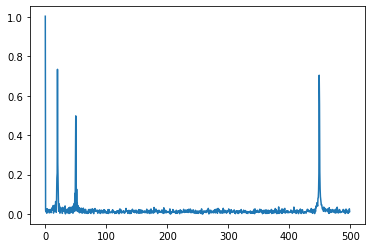

5.898465633392334  Sec


In [ ]:
t1 = time.time()
yf = np.fft.fft(y)
xf = np.linspace(0.0, 1.0//(2.0*T), N//2)
fig, ax = plt.subplots()
# ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
print("xf ",xf.shape,N,yf.shape)
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

print( t1-t0," Sec")

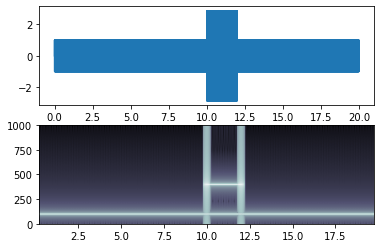

In [ ]:
# Fixing random state for reproducibility
np.random.seed(19680801)

dt = 0.0005
t = np.arange(0.0, 20.0, dt)
s1 = np.sin(2 * np.pi * 100 * t)
s2 = 2 * np.sin(2 * np.pi * 400 * t)

# create a transient "chirp"
s2[t <= 10] = s2[12 <= t] = 0

# add some noise into the mix
nse = 0.01 * np.random.random(size=len(t))

x = s1 + s2 # + nse  # the signal
NFFT = 1024  # the length of the windowing segments
Fs = int(1.0 / dt)  # the sampling frequency

fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.plot(t, x)
Pxx, freqs, bins, im = ax2.specgram(x, NFFT=NFFT, Fs=Fs, noverlap=900,cmap="bone")
# The `specgram` method returns 4 objects. They are:
# - Pxx: the periodogram
# - freqs: the frequency vector
# - bins: the centers of the time bins
# - im: the .image.AxesImage instance representing the data in the plot
plt.show()